In [51]:
import scipy.io

# Connect to Quantum Inspire QI using TOKEN file.
import models.connect_quantum_inspire as qi_tools
import models.quantum_state_circuits as qs_circuits
import importlib
import numpy as np
import matplotlib.pyplot as plt

importlib.reload(qi_tools)
importlib.reload(qs_circuits)

QI = qi_tools.connect_qi('../TOKEN')
qi_backend = QI.get_backend('QX single-node simulator')

# Quantum State Circuits

In [7]:
theta_vals = np.linspace(0, np.pi, 15)
phi_vals = np.zeros_like(theta_vals)
measurement_directions = np.array([theta_vals, phi_vals, theta_vals, phi_vals])

In [8]:
# Regenerating Figure 6 from J. Brody and G. Guzman, "Calculating spin correlations with a quantum computer", doi: 10.1119/10.0001967
# Get Expectation value for singlet state
circuit, q,b = qs_circuits.create_entangled_singlet()
circuit.barrier()
expectation_list_singlet = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backend, shots=512)

# Get Expectation value for triplet state
circuit, q,b = qs_circuits.create_entangled_triplet()
circuit.barrier()
expectation_list_triplet = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backend, shots=512)

# Get Expectation value for product state |00>
circuit, q,b = qs_circuits.create_product_state(0)
circuit.barrier()
expectation_list_product0 = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backend, shots=512)

# Get Expectation value for product state |11>
circuit, q,b = qs_circuits.create_product_state(1)
circuit.barrier()
expectation_list_product1 = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backend, shots=512)

The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

7771268


The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

7771268


The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

7771268


The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

7771268


In [26]:
def prob_hits_to_error(results_probs):
  spin = np.array([-(sum(map(int, list(each))) % 2 * 2 - 1) for each in results_probs.keys()]).reshape(4,1)
  probs = np.array(list(results_probs.values()))
  # standard_deviation = sqrt mean_of_squares - mean^2
  exp = np.sum(spin*probs, axis=0)
  exp_sq = np.sum(spin**2*probs, axis=0)
  variance = exp_sq - exp**2
  
  return spin, probs, exp, exp_sq, variance

In [ ]:
qi_backendstar = QI.get_backend('Starmon-5')
# Get Expectation value for product state |11>
circuit, q,b = qs_circuits.create_product_state(1)
circuit.barrier()
expectation_list_product1star = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backendstar, shots=512)

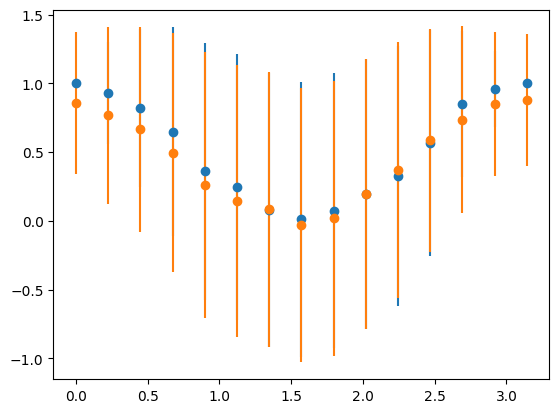

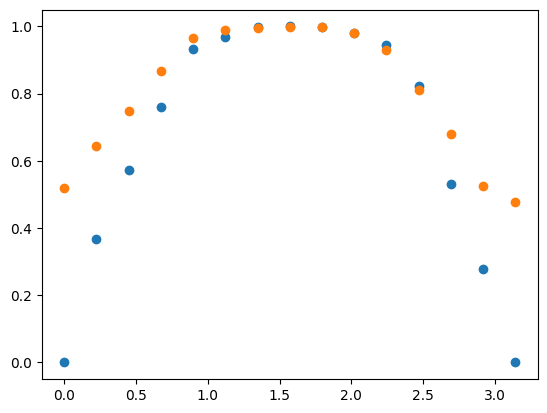

In [70]:
for each in [expectation_list_product1, expectation_list_product1star]:
    spin, probs, exp, exp_sq, variance = prob_hits_to_error(each[1])
    plt.errorbar(theta_vals, exp, yerr=np.sqrt(variance), fmt='o')
plt.show()

for each in [expectation_list_product1, expectation_list_product1star]:
    spin, probs, exp, exp_sq, variance = prob_hits_to_error(each[1])
    plt.scatter(theta_vals, np.sqrt(variance),)
plt.show()

In [14]:
qi_backendstar = QI.get_backend('Starmon-5')
circuit, q,b = qs_circuits.create_entangled_singlet()
circuit.barrier()
expectation_list_singletstar2 = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backendstar, shots=512)

circuit, q,b = qs_circuits.create_entangled_triplet()
circuit.barrier()
expectation_list_tripletstar = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backendstar, shots=512)

circuit, q,b = qs_circuits.create_product_state(0)
circuit.barrier()
expectation_list_product0star = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backendstar, shots=512)

circuit, q,b = qs_circuits.create_product_state(1)
circuit.barrier()
expectation_list_product1star = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backendstar, shots=512)

7771268
7771268
7771268
7771268


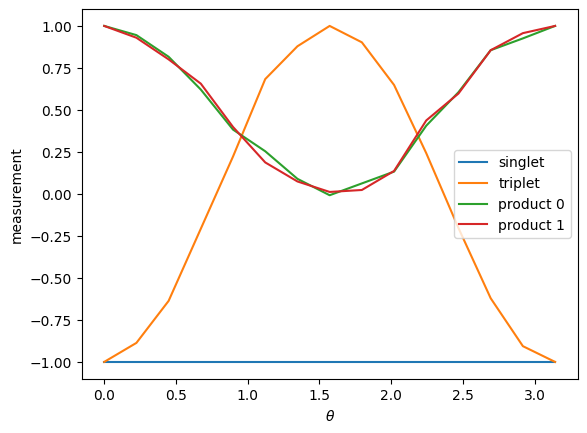

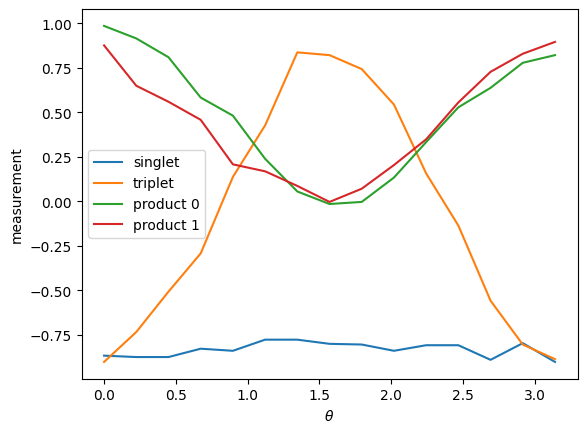

In [18]:
plt.plot(theta_vals, np.array([expectation_list_singlet[0], expectation_list_triplet[0], expectation_list_product0[0],expectation_list_product1[0]]).T)
plt.xlabel("$\\theta$")
plt.ylabel("measurement")
plt.legend(['singlet', 'triplet', 'product 0', 'product 1'])
plt.show()

plt.plot(theta_vals, np.array([expectation_list_singletstar2[0], expectation_list_tripletstar[0], expectation_list_product0star[0],expectation_list_product1star[0]]).T)
plt.xlabel("$\\theta$")
plt.ylabel("measurement")
plt.legend(['singlet', 'triplet', 'product 0', 'product 1'])
plt.show()

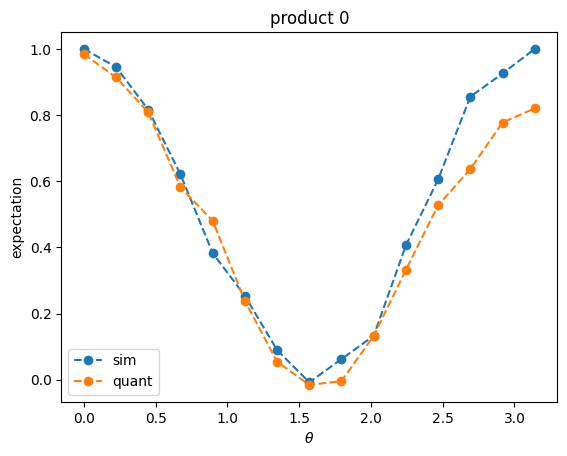

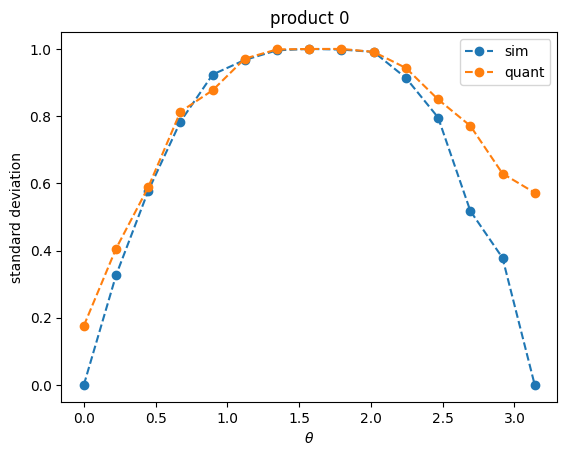

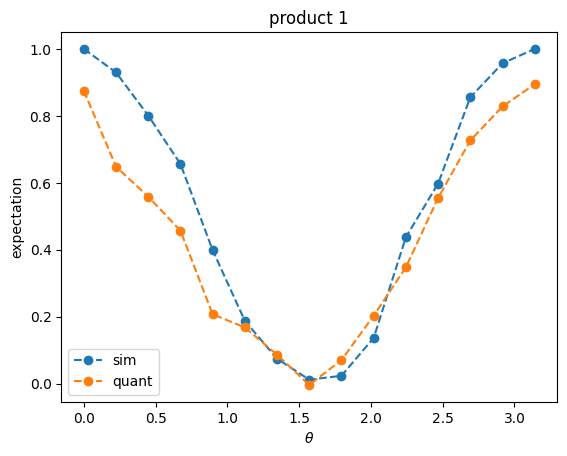

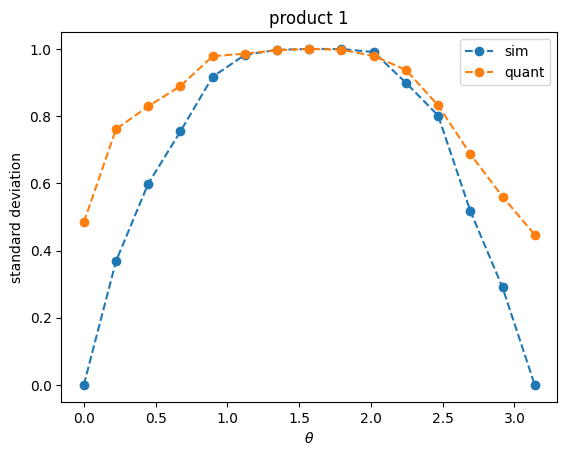

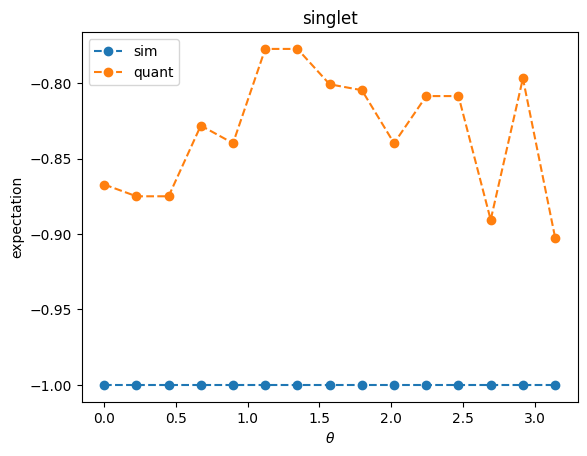

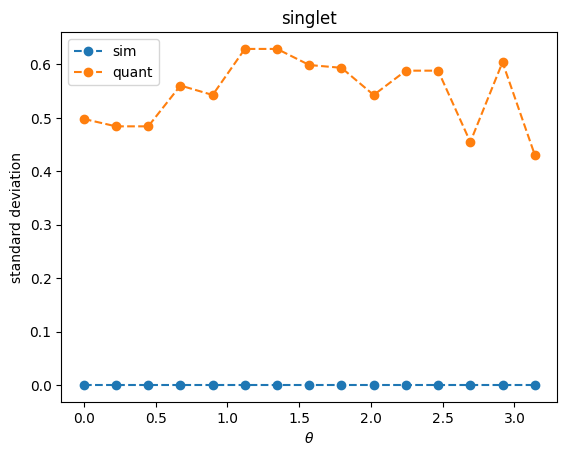

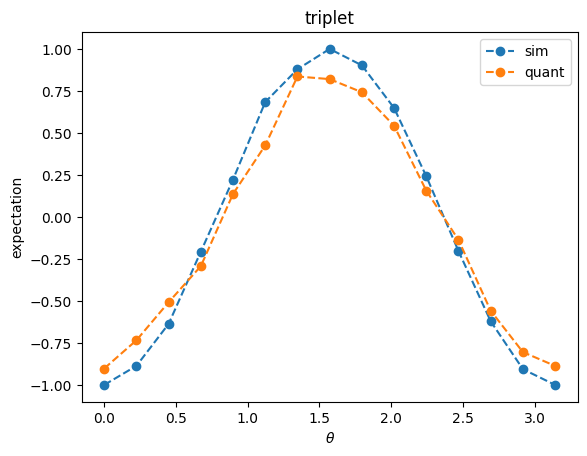

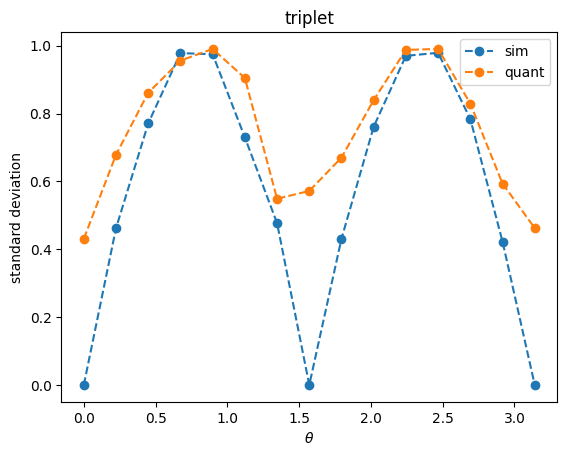

In [50]:
titles = ['product 0', 'product 1', 'singlet', 'triplet']
for sim, quant in zip([expectation_list_product0, expectation_list_product1, expectation_list_singlet, expectation_list_triplet],
                      [expectation_list_product0star, expectation_list_product1star, expectation_list_singletstar2,expectation_list_tripletstar]):
    
    _, _, exps, _, variances = prob_hits_to_error(sim[1])
    _, _, expq, _, varianceq = prob_hits_to_error(quant[1])
    plt.plot(theta_vals, exps,'o--', label='sim')
    plt.plot(theta_vals, expq,'o--', label='quant')
    plt.xlabel('$\\theta$')
    plt.ylabel('expectation')
    title = titles.pop(0)
    plt.title(title)
    plt.legend()
    plt.show()
    plt.plot(theta_vals, np.sqrt(variances), 'o--', label='sim')
    plt.plot(theta_vals, np.sqrt(varianceq), 'o--', label='quant')
    plt.xlabel('$\\theta$')
    plt.ylabel('standard deviation')
    plt.title(title)
    plt.legend()
    plt.show()

In [46]:
# Output results to csv
import pandas as pd
import scipy.io as sio


data = np.array([theta_vals, expectation_list_singlet[0], expectation_list_triplet[0], expectation_list_product0[0],expectation_list_product1[0]]).T
df = pd.DataFrame(data, columns=['theta', 'singlet', 'triplet', 'product 0', 'product 1'])
df.to_csv('expectations_sim.csv')
sio.savemat('expectations_sim.mat', {'data':data})

# for quantum data (star)
data = np.array([theta_vals, expectation_list_singletstar2[0], expectation_list_tripletstar[0], expectation_list_product0star[0],expectation_list_product1star[0]]).T
df = pd.DataFrame(data, columns=['theta', 'singlet', 'triplet', 'product 0', 'product 1'])
df.to_csv('expectations_quant.csv')
sio.savemat('expectations_quant.mat', {'data':data})

titles = ['singlet', 'triplet','product 0', 'product 1', ]
# Output raw data to csv
for each in [expectation_list_singlet, expectation_list_triplet, expectation_list_product0,expectation_list_product1]:
    data = np.array(list(each[1].values())).T
    df = pd.DataFrame(data, columns=list(each[1].keys()))
    name = titles.pop(0)
    df.to_csv('full_data_quant_{}.csv'.format(name))
    sio.savemat('full_data_quant_{}.mat'.format(name), {'data':data})
    
titles = ['singlet', 'triplet','product 0', 'product 1', ]
# Output raw data to csv
for each in [expectation_list_singletstar2, expectation_list_tripletstar, expectation_list_product0star,expectation_list_product1star]:
    data = np.array(list(each[1].values())).T
    df = pd.DataFrame(np.array(list(each[1].values())).T, columns=list(each[1].keys()))
    name = titles.pop(0)
    df.to_csv('full_data_quant_{}.csv'.format(name))
    sio.savemat('full_data_quant_{}.mat'.format(name), {'data':data})

In [39]:
list(each[1].values())

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.517578125,
  0.505859375,
  0.509765625,
  0.5234375,
  0.5,
  0.509765625,
  0.5234375,
  0.49609375,
  0.484375,
  0.525390625,
  0.50390625,
  0.49609375,
  0.4921875,
  0.490234375,
  0.484375],
 [0.482421875,
  0.494140625,
  0.490234375,
  0.4765625,
  0.5,
  0.490234375,
  0.4765625,
  0.50390625,
  0.515625,
  0.474609375,
  0.49609375,
  0.50390625,
  0.5078125,
  0.509765625,
  0.515625],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [59]:
def generate_expectation_values(backend, delay=0, shots=1000):
    # a b
    theta_vals = np.zeros((20))
    theta2_vals = np.linspace(0, np.pi, 20)
    phi_vals=np.zeros_like(theta_vals)
    
    ab_measurement_directions = np.array([theta_vals, phi_vals, theta2_vals, phi_vals])
    abp_measurement_directions = np.array([theta_vals, phi_vals, theta2_vals+np.pi/2, phi_vals])
    apb_measurement_directions = np.array([theta_vals+np.pi/2, phi_vals, theta2_vals, phi_vals])
    apbp_measurement_directions = np.array([theta_vals+np.pi/2, phi_vals, theta2_vals+np.pi/2, phi_vals])
    
    circuit, q, b = qs_circuits.create_entangled_singlet()
    circuit.barrier()
    if delay > 0:
        circuit.delay(delay)
        
    expectation_list_singlet_ab = qs_circuits.measure_circuit_directions(circuit, q, b, ab_measurement_directions, backend, shots=shots)
    expectation_list_singlet_abp = qs_circuits.measure_circuit_directions(circuit, q, b, abp_measurement_directions, backend, shots=shots)
    expectation_list_singlet_apb = qs_circuits.measure_circuit_directions(circuit, q, b, apb_measurement_directions, backend, shots=shots)
    expectation_list_singlet_apbp = qs_circuits.measure_circuit_directions(circuit, q, b, apbp_measurement_directions, backend, shots=shots)
    
    return expectation_list_singlet_ab, expectation_list_singlet_abp, expectation_list_singlet_apb, expectation_list_singlet_apbp

In [52]:
eab, eabp, eapb, eapbp = generate_expectation_values(qi_backend, delay=0, shots=512)

The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

7771268


The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

7771268


The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

7771268


The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

7771268


Text(0, 0.5, 'S?')

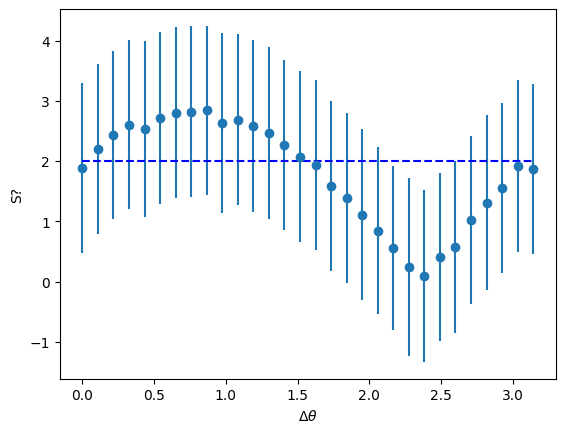

In [62]:
_, _, _, _, vab = prob_hits_to_error(eab[1])
_, _, _, _, vabp = prob_hits_to_error(eabp[1])
_, _, _, _, vapb = prob_hits_to_error(eapb[1])
_, _, _, _, vapbp = prob_hits_to_error(eapbp[1])
stdev = np.sqrt(vab+vabp+vapb+vapbp)

## Plot Bells Inequality
# |E(a,b)-E(a,b')|+|E(a',b')+E(a',b)| <= 2
#plt.plot(np.linspace(0,np.pi,30), np.abs(np.array(eab[0])-np.array(eabp[0]))+np.abs(np.array(eapbp[0])+np.array(eapb[0])))
plt.errorbar(np.linspace(0,np.pi,30), np.abs(np.array(eab[0])-np.array(eabp[0]))+np.abs(np.array(eapbp[0])+np.array(eapb[0])), yerr=stdev, fmt='o')

# |E(a,b)+E(a,b')|+|E(a',b')-E(a',b)| <= 2
# plt.plot(np.linspace(0,np.pi,30), np.abs(np.array(eab[0])+np.array(eabp[0]))+np.abs(np.array(eapbp[0])-np.array(eapb[0])))

# Plot blue dotted line at y=2 to show violation of Bell's inequality for singlet state, i.e. first inequality
plt.plot(np.linspace(0,np.pi,30), np.ones_like(np.linspace(0,np.pi,30))*2, 'blue', linestyle='--')

plt.xlabel('$\\Delta \\theta$')
plt.ylabel('S?')

In [ ]:
eabq, eabpq, eapbq, eapbpq = generate_expectation_values(qi_backendstar, delay=0, shots=512)

Text(0, 0.5, 'S?')

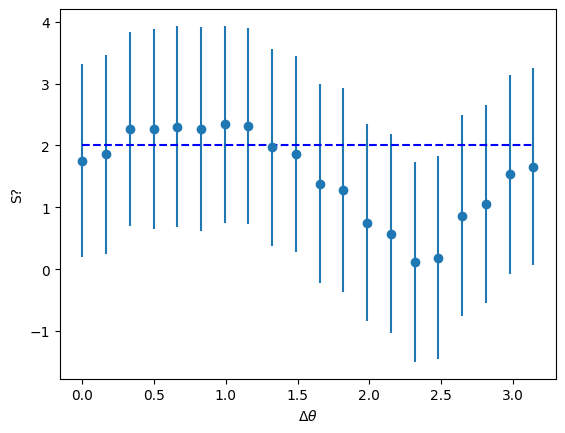

In [65]:
_, _, _, _, vabq = prob_hits_to_error(eabq[1])
_, _, _, _, vabpq = prob_hits_to_error(eabpq[1])
_, _, _, _, vapbq = prob_hits_to_error(eapbq[1])
_, _, _, _, vapbpq = prob_hits_to_error(eapbpq[1])
stdevq = np.sqrt(vabq+vabpq+vapbq+vapbpq)

## Plot Bells Inequality
# |E(a,b)-E(a,b')|+|E(a',b')+E(a',b)| <= 2
#plt.plot(np.linspace(0,np.pi,30), np.abs(np.array(eab[0])-np.array(eabp[0]))+np.abs(np.array(eapbp[0])+np.array(eapb[0])))
plt.errorbar(np.linspace(0,np.pi,20), np.abs(np.array(eabq[0])-np.array(eabpq[0]))+np.abs(np.array(eapbpq[0])+np.array(eapbq[0])), yerr=stdevq, fmt='o')

# |E(a,b)+E(a,b')|+|E(a',b')-E(a',b)| <= 2
# plt.plot(np.linspace(0,np.pi,30), np.abs(np.array(eab[0])+np.array(eabp[0]))+np.abs(np.array(eapbp[0])-np.array(eapb[0])))

# Plot blue dotted line at y=2 to show violation of Bell's inequality for singlet state, i.e. first inequality
plt.plot(np.linspace(0,np.pi,30), np.ones_like(np.linspace(0,np.pi,30))*2, 'blue', linestyle='--')

plt.xlabel('$\\Delta \\theta$')
plt.ylabel('S?')

In [66]:
eabqd, eabpqd, eapbqd, eapbpqd = generate_expectation_values(qi_backendstar, delay=15, shots=512)

7771268
7771268
7771268
7771268


Text(0, 0.5, 'S?')

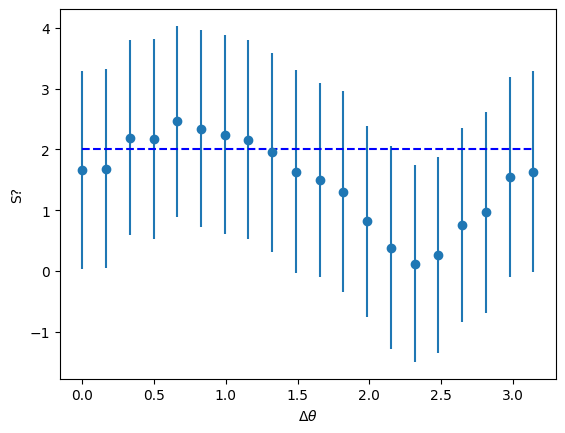

In [67]:
_, _, _, _, vabqd = prob_hits_to_error(eabqd[1])
_, _, _, _, vabpqd = prob_hits_to_error(eabpqd[1])
_, _, _, _, vapbqd = prob_hits_to_error(eapbqd[1])
_, _, _, _, vapbpqd = prob_hits_to_error(eapbpqd[1])
stdevqd = np.sqrt(vabqd+vabpqd+vapbqd+vapbpqd)

## Plot Bells Inequality
# |E(a,b)-E(a,b')|+|E(a',b')+E(a',b)| <= 2
#plt.plot(np.linspace(0,np.pi,30), np.abs(np.array(eab[0])-np.array(eabp[0]))+np.abs(np.array(eapbp[0])+np.array(eapb[0])))
plt.errorbar(np.linspace(0,np.pi,20), np.abs(np.array(eabqd[0])-np.array(eabpqd[0]))+np.abs(np.array(eapbpqd[0])+np.array(eapbqd[0])), yerr=stdevqd, fmt='o')

# |E(a,b)+E(a,b')|+|E(a',b')-E(a',b)| <= 2
# plt.plot(np.linspace(0,np.pi,30), np.abs(np.array(eab[0])+np.array(eabp[0]))+np.abs(np.array(eapbp[0])-np.array(eapb[0])))

# Plot blue dotted line at y=2 to show violation of Bell's inequality for singlet state, i.e. first inequality
plt.plot(np.linspace(0,np.pi,30), np.ones_like(np.linspace(0,np.pi,30))*2, 'blue', linestyle='--')

plt.xlabel('$\\Delta \\theta$')
plt.ylabel('S?')

In [102]:
delays = np.arange(0, 40)*10

theta1 = 0
theta2 = np.pi/4
phi1 = 0
phi2 = 0

# singlet state
circuit, q, b = qs_circuits.create_entangled_singlet()
circuit.barrier()

Eab = qs_circuits.measure_circuit_delays(circuit, q, b, delays, theta1, phi1, theta2, phi2, qi_backend, shots=512)
Eabp = qs_circuits.measure_circuit_delays(circuit, q, b, delays, theta1, phi1, theta2+np.pi/2, phi2, qi_backend, shots=512)
Eapb = qs_circuits.measure_circuit_delays(circuit, q, b, delays, theta1+np.pi/2, phi1, theta2, phi2, qi_backend, shots=512)
Eapbp = qs_circuits.measure_circuit_delays(circuit, q, b, delays, theta1+np.pi/2, phi1, theta2+np.pi/2, phi2, qi_backend, shots=512)

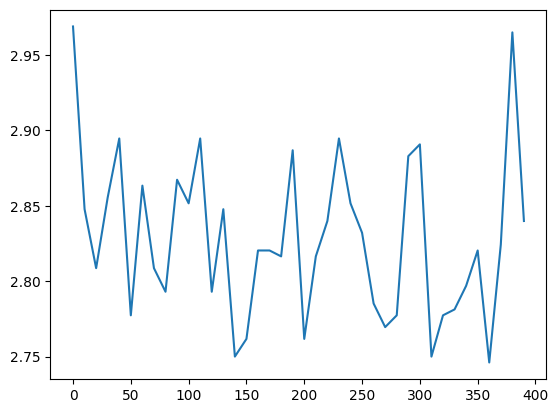

In [103]:
plt.plot(delays, np.abs(np.array(Eab[0])-np.array(Eabp[0]))+np.abs(np.array(Eapbp[0])+np.array(Eapb[0])))

In [77]:
 = np.arange(0, 20)*10

theta1 = 0
theta2 = np.pi/4
phi1 = 0
phi2 = 0
# singlet state
circuit, q, b = qs_circuits.create_entangled_singlet()
circuit.barrier()

Eabq = qs_circuits.measure_circuit_delays(circuit, q, b, delays, theta1, phi1, theta2, phi2, qi_backendstar, shots=512)
Eabpq = qs_circuits.measure_circuit_delays(circuit, q, b, delays, theta1, phi1, theta2+np.pi/2, phi2, qi_backendstar, shots=512)
Eapbq = qs_circuits.measure_circuit_delays(circuit, q, b, delays, theta1+np.pi/2, phi1, theta2, phi2, qi_backendstar, shots=512)
Eapbpq = qs_circuits.measure_circuit_delays(circuit, q, b, delays, theta1+np.pi/2, phi1, theta2+np.pi/2, phi2, qi_backendstar, shots=512)

7771268
7771268
7771268
7771268


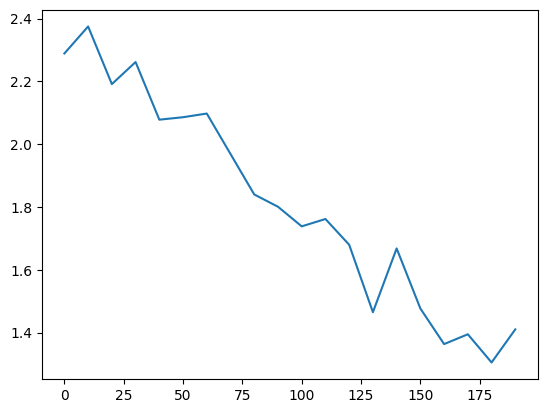

In [78]:
plt.plot(delays, np.abs(np.array(Eabq[0])-np.array(Eabpq[0]))+np.abs(np.array(Eapbpq[0])+np.array(Eapbq[0])))

In [ ]:
qi_backendstar = QI.get_backend('Starmon-5')
iterations = 10

Eablist = []
Eabplist = []
Eapblist = []
Eapbplist = []

for ii in range(iterations):
    delays = np.arange(0, 50)*40

    theta1 = 0
    theta2 = np.pi/4
    phi1 = 0
    phi2 = 0
    # singlet state
    circuit, q, b = qs_circuits.create_entangled_singlet()
    circuit.barrier()
    
    Eabq2 = qs_circuits.measure_circuit_delays(circuit, q, b, delays, theta1, phi1, theta2, phi2, qi_backendstar, shots=4096)
    Eabpq2 = qs_circuits.measure_circuit_delays(circuit, q, b, delays, theta1, phi1, theta2+np.pi/2, phi2, qi_backendstar, shots=4096)
    Eapbq2 = qs_circuits.measure_circuit_delays(circuit, q, b, delays, theta1+np.pi/2, phi1, theta2, phi2, qi_backendstar, shots=4096)
    Eapbpq2 = qs_circuits.measure_circuit_delays(circuit, q, b, delays, theta1+np.pi/2, phi1, theta2+np.pi/2, phi2, qi_backendstar, shots=4096)
    
    Eablist.append(Eabq2)
    Eabplist.append(Eabpq2)
    Eapblist.append(Eapbq2)
    Eapbplist.append(Eapbpq2)

In [81]:
_, _, _, _, vabq2 = prob_hits_to_error(Eabq2[1])
_, _, _, _, vabpq2 = prob_hits_to_error(Eabpq2[1])
_, _, _, _, vapbq2 = prob_hits_to_error(Eapbq2[1])
_, _, _, _, vapbpq2 = prob_hits_to_error(Eapbpq2[1])

<ErrorbarContainer object of 3 artists>

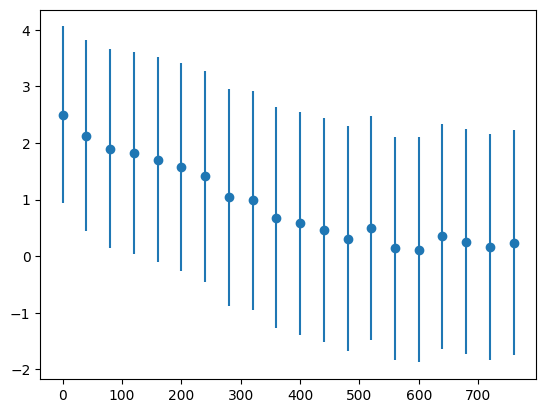

In [82]:
plt.errorbar(delays, np.abs(np.array(Eabq2[0])-np.array(Eabpq2[0]))+np.abs(np.array(Eapbpq2[0])+np.array(Eapbq2[0])), yerr=np.sqrt(vabq2+vabpq2+vapbq2+vapbpq2), fmt='o')

Text(0.5, 0, 'Delay (cycles)')

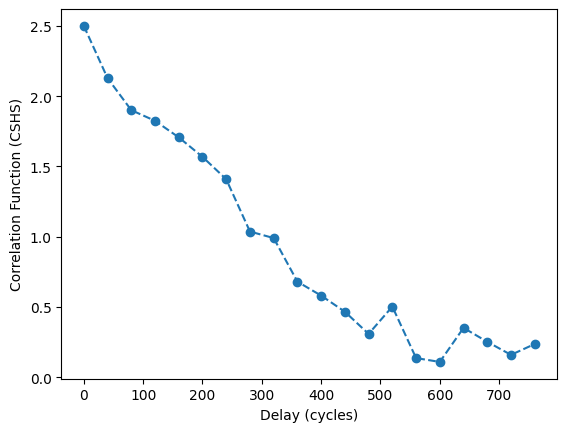

In [86]:
plt.plot(delays, np.abs(np.array(Eabq2[0])-np.array(Eabpq2[0]))+np.abs(np.array(Eapbpq2[0])+np.array(Eapbq2[0])), 'o--')
plt.ylabel("Correlation Function (CSHS)")
plt.xlabel("Delay (cycles)")

In [87]:
## Output some of the data collected here to CSV.
import pandas as pd
import scipy.io as sio

# Data consisting of four columns AB AB' A'B A'B'
data = np.array([delays, Eabq2[0], Eabpq2[0], Eapbq2[0], Eapbpq2[0]]).T
df = pd.DataFrame(data, columns=['delay', 'Eab', 'Eabp', 'Eapb', 'Eapbp'])
df.to_csv('bell_inequality_quant2.csv')
sio.savemat('bell_inequality_quant2.mat', {'data':data})

# Raw data for AB AB' A'B A'B' in a file each
titles = ['Eab', 'Eabp', 'Eapb', 'Eapbp']
for each in [Eabq2, Eabpq2, Eapbq2, Eapbpq2]:
    data = np.array(list(each[1].values())).T
    df = pd.DataFrame(data, columns=list(each[1].keys()))
    name = titles.pop(0)
    df.to_csv('full_data_quant2_{}.csv'.format(name))
    sio.savemat('full_data_quant2_{}.mat'.format(name), {'data':data})

In [11]:
import pandas as pd
import scipy.io as sio
for ii in range(iterations):
    # Data consisting of four columns AB AB' A'B A'B'
    data = np.array([delays, Eablist[ii][0], Eabplist[ii][0], Eapblist[ii][0], Eapbplist[ii][0]]).T
    df = pd.DataFrame(data, columns=['delay', 'Eab', 'Eabp', 'Eapb', 'Eapbp'])
    df.to_csv('bell_inequality_quant_{}.csv'.format(ii))
    sio.savemat('bell_inequality_quant_{}.mat'.format(ii), {'data':data})
    
    # Raw data for AB AB' A'B A'B' in a file each
    # titles = ['Eab', 'Eabp', 'Eapb', 'Eapbp']
    # for each in [Eablist, Eabplist, Eapblist, Eapbplist]:
    #     data = np.array(list(each[ii][1].values())).T
    #     df = pd.DataFrame(data, columns=list(each[ii][1].keys()))
    #     name = titles.pop(0)
    #     df.to_csv('full_data_quant_{}_{}.csv'.format(ii,name))
    #     sio.savemat('full_data_quant_{}_{}.mat'.format(ii,name), {'data':data})

In [ ]:
for ii in range(iterations):
    plt.plot(delays*20/1000, np.abs(np.array(Eablist[ii][0])-np.array(Eabplist[ii][0]))+np.abs(np.array(Eapbplist[ii][0])+np.array(Eapblist[ii][0])), 'o--')
plt.ylabel("Correlation Function (CHSH)")
plt.xlabel("Delay ($\mu s$)") 
plt.show()

# Mean of all iterations
Eabmean = np.mean(np.array([each[0] for each in Eablist]), axis=0)
Eabpmean = np.mean(np.array([each[0] for each in Eabplist]), axis=0)
Eapbmean = np.mean(np.array([each[0] for each in Eapblist]), axis=0)
Eapbpmean = np.mean(np.array([each[0] for each in Eapbplist]), axis=0)

shots = 4096
error = np.sqrt(np.var(np.array([each[0] for each in Eablist]), axis=0)/shots+np.var(np.array([each[0] for each in Eabplist]), axis=0)/shots+np.var(np.array([each[0] for each in Eapblist]), axis=0)/shots+np.var(np.array([each[0] for each in Eapbplist]), axis=0)/shots)
plt.errorbar(delays, np.abs(np.array(Eabmean)-np.array(Eabpmean)+np.array(Eapbpmean)+np.array(Eapbmean)),yerr=np.sqrt(error))

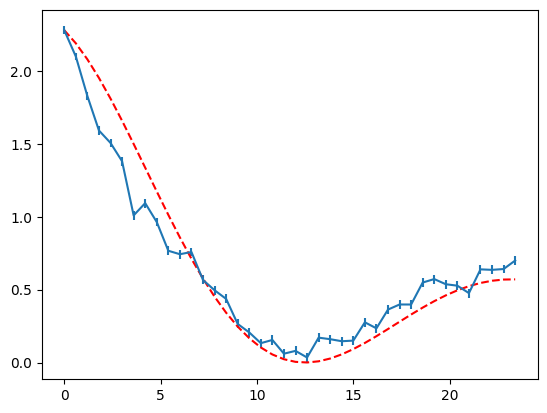

In [50]:
# Variance for each sample
varEab = np.array([prob_hits_to_error(each[1])[3]-Eabmean**2 for each in Eablist])/shots
varEabp = np.array([prob_hits_to_error(each[1])[3]-Eabpmean**2 for each in Eabplist])/shots
varEapb = np.array([prob_hits_to_error(each[1])[3]-Eapbmean**2 for each in Eapblist])/shots
varEapbp = np.array([prob_hits_to_error(each[1])[3]-Eapbpmean**2 for each in Eapbplist])/shots

total_variance = varEab+varEabp+varEapb+varEapbp
stdev = np.mean(np.sqrt(total_variance),axis=0)

plt.errorbar(delays*20/1000, np.abs(np.array(Eabmean) - np.array(Eabpmean) + np.array(Eapbpmean) + np.array(Eapbmean)),
             yerr=(stdev))
tau = 17.4
plt.plot((delays*20/1000), (1+np.real(np.exp(1j*2*np.pi*(delays*20/1000)/25)))/2*np.exp(-(delays*20/1000)/tau)*np.max(np.abs(np.array(Eabmean) - np.array(Eabpmean) + np.array(Eapbpmean) + np.array(Eapbmean))), 'r--')

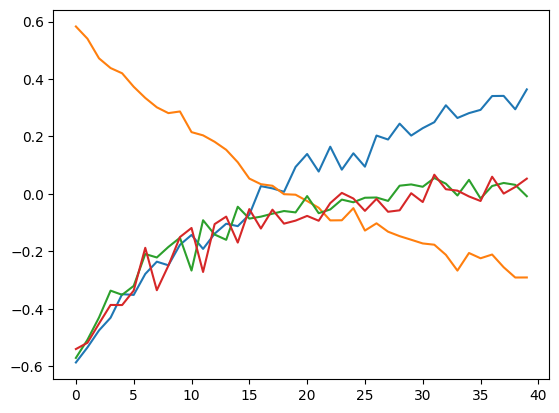

In [20]:
plt.plot(Eabmean)
plt.plot(Eabpmean)
plt.plot(Eapbmean)
plt.plot(Eapbpmean)
plt.show()